In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

In [16]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

## Import Data 

In [17]:
train = pd.read_csv('train_v2.csv')
test = pd.read_csv('test_v2.csv')

In [18]:
y = train.SalePrice
train = train.drop(columns=['Id', 'SalePrice'])

In [19]:
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (1451, 335)
Test shape: (1459, 335)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.30, random_state=0)
print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train : (1015, 335)
X_test : (436, 335)
y_train : (1015,)
y_test : (436,)


In [21]:
stdSc = StandardScaler()
X_train = pd.DataFrame(stdSc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(stdSc.transform(X_test), columns=X_test.columns, index=X_test.index)

In [22]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

def rmse_train(model):
    r = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(r)
    
def rmse_test(model):
    r = np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(r)

## Elastic Net CV
#### l1_ration Selection

In [ ]:
l1_ratio = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.5, 1]
param_grids = dict(l1_ratio=l1_ratio)
model = ElasticNetCV(max_iter=100000, cv=10)

gridSearch = GridSearchCV(model, param_grids, scoring=scorer, cv=10)

In [ ]:
gridResult = gridSearch.fit(X_train, y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))

means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.plot(l1_ratio, means)
plt.title('rmse mean against l1_ratio')
plt.xlabel('n_estimator')
plt.ylabel('rmse mean')
plt.show()

In [ ]:
l = gridResult.best_params_.values()
print(l)

#### Alpha Selection

In [ ]:
alpha_list=[0.01,0.03,0.1,0.3,1,3,10]
elasticNet = ElasticNetCV(l1_ratio=0.01, alphas=alpha_list, max_iter=100000, cv=10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
print(f'alpha = {alpha}')

In [66]:
from sklearn.linear_model import LassoCV, Lasso, Ridge, RidgeCV

In [38]:
model = ElasticNet(l1_ratio=0.3, alpha=0.01, max_iter=200000, tol=0.00000001)

In [59]:
model = Lasso(alpha=0.003, max_iter=200000, tol=0.00000001)

In [76]:
model = RidgeCV(alphas=[0.1,0.3,1,3,10,30,100,300],
                cv=10)

In [51]:
model = LassoCV(alphas=[0.001,0.003,0.01,0.03,0.1,0.3, 1,3],
                max_iter=500000,
                cv=10,
                tol=0.00000001)

In [ ]:
model = ElasticNetCV(l1_ratio=[0.001,0.003,0.01,0.03,0.1,0.3, 1,3],
                    alphas=[0.001,0.003,0.01,0.03,0.1,0.3, 1,3],
                    max_iter=200000,
                    cv=10,
                    tol=0.000001)

In [77]:
model.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-01, 3.e-01, 1.e+00, 3.e+00, 1.e+01, 3.e+01, 1.e+02, 3.e+02]),
        cv=10)

In [78]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [79]:
print(f'Train rmse: {rmse_train(model).mean()}')
print(f'Test rmse: {rmse_test(model).mean()}')

Train rmse: 0.10996332471687584
Test rmse: 0.11311105607202102


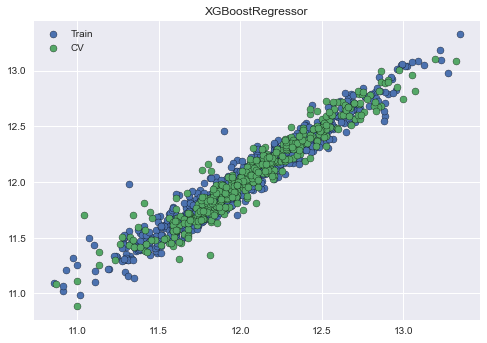

In [80]:
plt.style.use('seaborn')
plt.scatter(y_train, train_pred, label='Train', edgecolors='black')
plt.scatter(y_test, test_pred, label='CV', edgecolors='black')
plt.legend(loc=0)
plt.title('XGBoostRegressor')
plt.show()

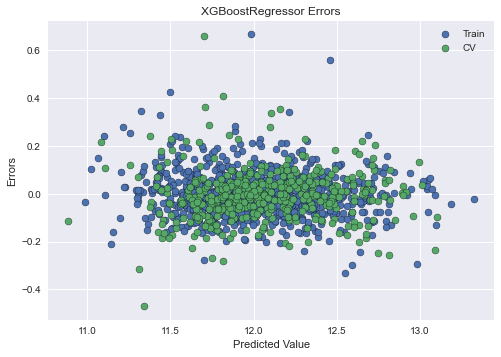

In [81]:
plt.scatter(train_pred, train_pred - y_train , label='Train', edgecolors='black')
plt.scatter(test_pred, test_pred - y_test, label='CV', edgecolors='black')
plt.legend(loc=0)
plt.title('XGBoostRegressor Errors')
plt.xlabel('Predicted Value')
plt.ylabel('Errors')
plt.show()

In [82]:
alpha = model.alpha_
# l1 = model.l1_ratio_

# print(f'l1_ratio: {l1}\t alpha: {alpha}')
print(f'alpha: {alpha}')

alpha: 300.0
